### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Define the Models

In [2]:
class KNearestNeighbour:
    def __init__(self, k, metric, p=3):
        self.k = k
        self.metric = metric
        if metric == 'Minkowski':
            self.p = p
    
    def fit(self, X, Y):
        self.X_ = X
        self.Y_ = Y
    
    def predict(self, X):
        Y_pred = np.empty((X.shape[0], 1), dtype='object')
        
        for i, x in enumerate(X):
            if self.metric == 'Euclidean':
                dist = np.linalg.norm(self.X_ - x, axis=1)
            elif self.metric ==  'Manhattan':
                dist = np.sum(np.abs(self.X_ - x), axis=1)
            elif self.metric == 'Minkowski':
                dist = np.sum(np.power(self.X_ - x, self.p), axis=1)
            
            sort = np.argsort(dist)
            sort = sort[:self.k]
            top_k = pd.Series(self.Y_[sort].ravel())
            
            tmp = top_k.value_counts().sort_values(ascending=False)
            Y_pred[i, 0] = tmp.index[0]
        
        return Y_pred
        

### Loading the Dataset

In [3]:
df = pd.read_csv('dataset.csv')

df.head()

,X1 = Acid Durability(seconds),X2 = Strength(kg/square meter),Y = Classification
0,7,7,Bad
1,7,4,Bad
2,3,4,Good
3,1,4,Good
4,4,5,Bad


In [4]:
new_names = {}
for col in df.columns:
    new_names[col] = col.split(' ')[0]

In [5]:
df.rename(columns=new_names, inplace=True)

In [6]:
df.head()

,X1,X2,Y
0,7,7,Bad
1,7,4,Bad
2,3,4,Good
3,1,4,Good
4,4,5,Bad


### Data Visualization

In [7]:
good = df['Y'] == 'Good'
bad = df['Y'] == 'Bad'

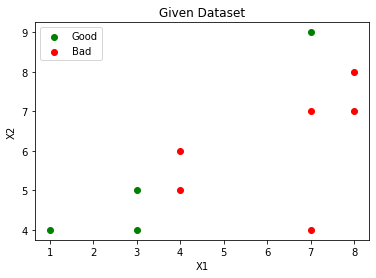

In [8]:
plt.scatter(df['X1'][good], df['X2'][good], c='green', label='Good')
plt.scatter(df['X1'][bad], df['X2'][bad], c='red', label='Bad')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Given Dataset')
plt.legend()
plt.show()

### Prepare the Dataset for Training

In [9]:
X_train, Y_train = df.drop('Y', axis=1).values, df['Y']

### Define the Testing Point

In [10]:
X_test = np.array([[3, 7]])

### Train and Run the Model for Different Values of k and Distance Metrics

In [11]:
K = [2, 3, 4]
DIST_METRIC = ['Euclidean', 'Manhattan', 'Minkowski']

classification = pd.DataFrame(columns=['K'] + DIST_METRIC)

for k in K:
    row = {'K': k}
    for met in DIST_METRIC:
        model = KNearestNeighbour(k=k, metric=met)
        model.fit(X_train, Y_train)
        
        pred = model.predict(X_test)
        row[met] = pred[0, 0]
        
    classification = classification.append(row, ignore_index=True)

In [12]:
print('Classification Results for different values of k and distance metrics: ')
classification

Classification Results for different values of k and distance metrics: 


,K,Euclidean,Manhattan,Minkowski
0,2,Bad,Good,Good
1,3,Bad,Good,Good
2,4,Bad,Good,Good
